# Process Player Data
We attempt to make sense of the player data by looking at certain distributions

In [83]:
from datetime import datetime

def extract_age(birthday_str):
    """
    Extracts age from a birthday string in format "Month Day, Year (Age)".
  
    Args:
      birthday_str (str): The birthday string containing month, day, year, and age.

    Returns:
      int: The extracted age as an integer.
    """
    # Split the string into components
    month, day, year, age = birthday_str.split()

    # Extract year (assuming age is in parentheses)
    age = int(age[1:-1])  # Remove closing parenthesis

    return age

In [84]:
def add_age_column(df):
    birthday_col = df['Birthday']
    ages = []
    for birthday_str in birthday_col:
        ages.append(extract_age(birthday_str))
    assert(len(ages) == len(birthday_col))
    df['Age'] = ages
    return df

In [85]:
def convert_to_int(df, column_name):
    """
    This function handles blank or '-' entries in an appearances column before converting it to integer.

    Args:
      df (pandas.DataFrame): The DataFrame containing the appearances column.
      column_name (str): The name of the appearances column.

    Returns:
      pandas.DataFrame: The DataFrame with the appearances column cleaned and converted to integer.
    """

    # Replace blank or '-' values with NaN (Not a Number)
    df[column_name] = df[column_name].replace(['', '-'], np.nan)

    # Convert the column to integer (fillna fills NaN with a specified value, 0 in this case)
    df[column_name] = df[column_name].fillna(0).astype(int)

    return df

In [95]:
def convert_days_to_int(df):
    """
    This function converts a column containing injury days in string format (e.g., "13 Days") to integer.

    Args:
      df (pandas.DataFrame): The DataFrame containing the "Total Days" column.
      column_name (str): The name of the "Total Days" column.

    Returns:
      pandas.DataFrame: The DataFrame with the "Total Days" column converted to integer.
    """

    # Extract the numerical part using regular expressions (import re if not already imported)
    import re
    pattern = r"(\d+)"  # Match one or more digits
    df["Total Days"] = df["Total Days"].str.extract(pattern, expand=False).astype(int)

    # Handle potential errors (e.g., 'nan' if no digits found)
    df["Total Days"] = pd.to_numeric(df["Total Days"], errors='coerce')  # Coerce errors to NaN

    return df

In [98]:
import pandas as pd

prem_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/prem_player_data.csv')
prem_player_data_df = add_age_column(prem_player_data_df)
prem_player_data_df = convert_to_int(prem_player_data_df, "Appearances")
prem_player_data_df = convert_days_to_int(prem_player_data_df)

laliga_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/laliga_player_data.csv')
laliga_player_data_df = add_age_column(laliga_player_data_df)
laliga_player_data_df = convert_to_int(laliga_player_data_df, "Appearances")
laliga_player_data_df = convert_days_to_int(laliga_player_data_df)


bundesliga_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/bundesliga_player_data.csv')
bundesliga_player_data_df = add_age_column(bundesliga_player_data_df)
bundesliga_player_data_df = convert_to_int(bundesliga_player_data_df, "Appearances")
bundesliga_player_data_df = convert_days_to_int(bundesliga_player_data_df)

serie_a_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/serie_a_player_data.csv')
serie_a_player_data_df = add_age_column(serie_a_player_data_df)
serie_a_player_data_df = convert_to_int(serie_a_player_data_df, "Appearances")
serie_a_player_data_df = convert_days_to_int(serie_a_player_data_df)

ligue_1_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/ligue_1_player_data.csv')
ligue_1_player_data_df = add_age_column(ligue_1_player_data_df)
ligue_1_player_data_df = convert_to_int(ligue_1_player_data_df, "Appearances")
ligue_1_player_data_df = convert_days_to_int(ligue_1_player_data_df)

In [99]:
prem_player_data_df.head()

,Name,Birthday,Height,League,Club,Position,Appearances,Injuries,Total Days,Total Games Missed,Minutes Played Total 23/24:,Age
0,Bernd Leno,"Mar 4, 1992 (32)","1,90 m",Premier League,Fulham,Goalkeeper,41,"{'Nose surgery': {'Days': '16 days', 'Games mi...",16,3,3.690',32
1,Marek Rodák,"Dec 13, 1996 (27)","1,94 m",Premier League,Fulham,Goalkeeper,5,{},0,0,450',27
2,Steven Benda,"Oct 1, 1998 (25)","1,92 m",Premier League,Fulham,Goalkeeper,3,{},0,0,270',25
3,Tosin Adarabioyo,"Sep 24, 1997 (26)","1,96 m",Premier League,Fulham,Centre-Back,25,"{'Knock': {'Days': '12 days', 'Games missed': ...",99,12,1.995',26
4,Issa Diop,"Jan 9, 1997 (27)","1,94 m",Premier League,Fulham,Centre-Back,25,"{'Calf problems': {'Days': '35 days', 'Games m...",112,16,1.949',27


# Get Basic Distributions
1. Age Distribution
2. Position Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

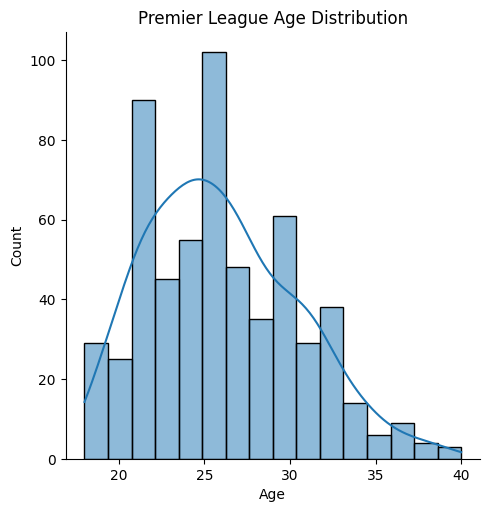

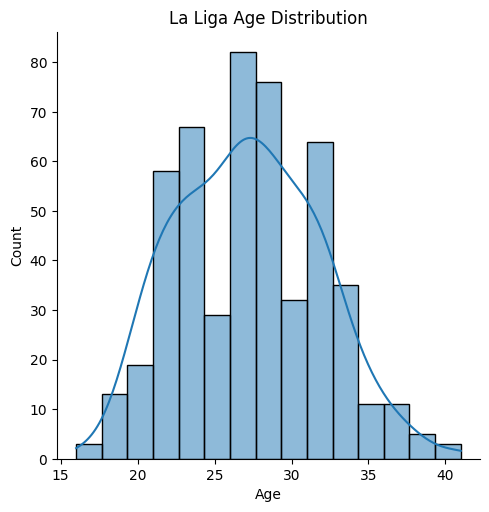

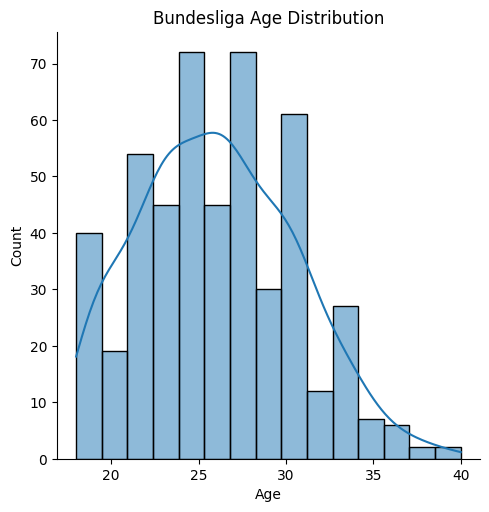

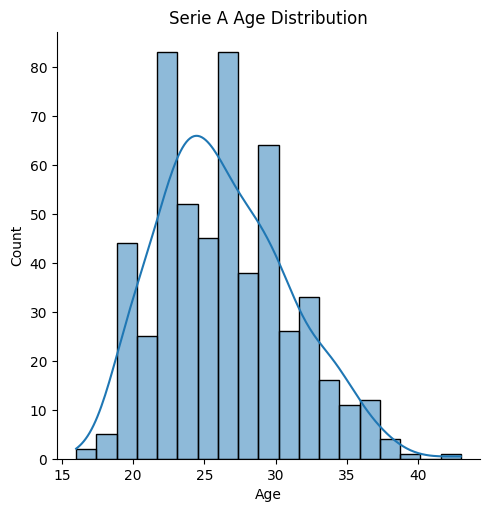

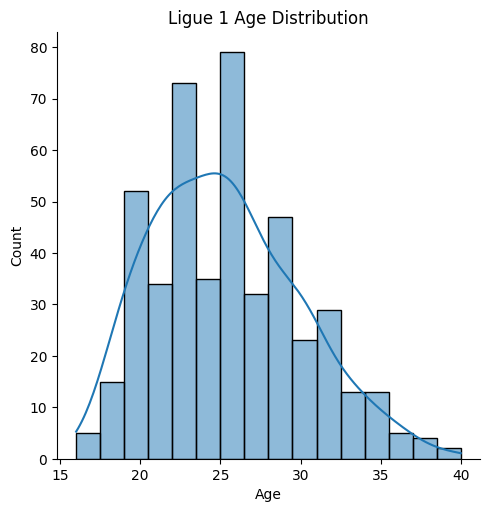

In [88]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

sns.displot(data=prem_player_data_df, x="Age", kde=True).set(title='Premier League Age Distribution')
sns.displot(data=laliga_player_data_df, x="Age", kde=True).set(title='La Liga Age Distribution')
sns.displot(data=bundesliga_player_data_df, x="Age", kde=True).set(title='Bundesliga Age Distribution')
sns.displot(data=serie_a_player_data_df, x="Age", kde=True).set(title='Serie A Age Distribution')
sns.displot(data=ligue_1_player_data_df, x="Age", kde=True).set(title='Ligue 1 Age Distribution')

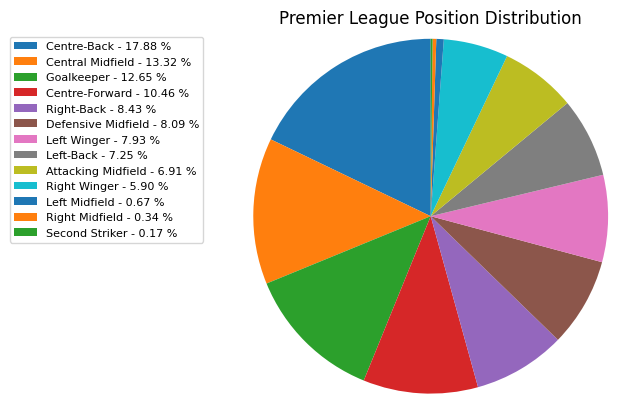

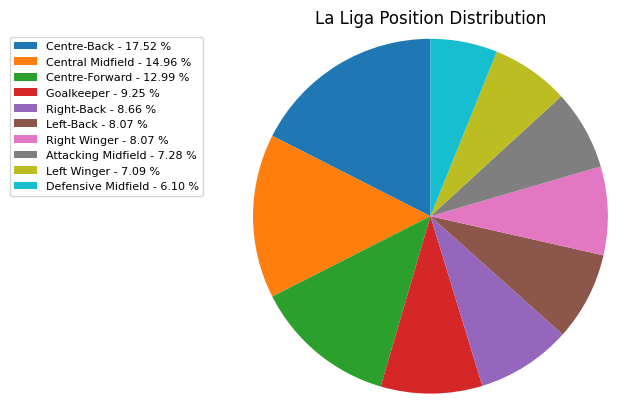

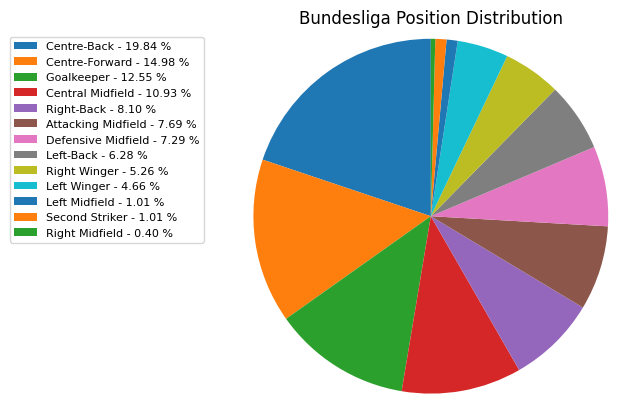

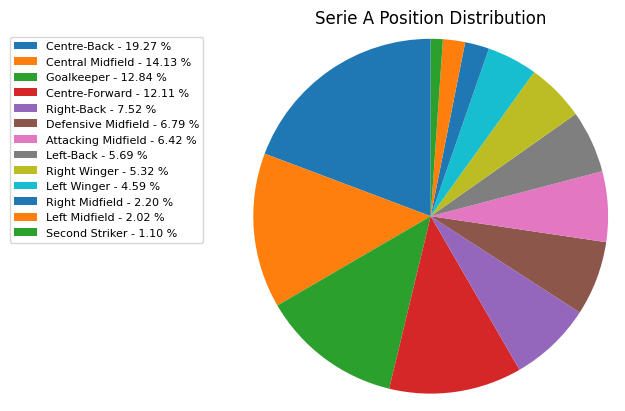

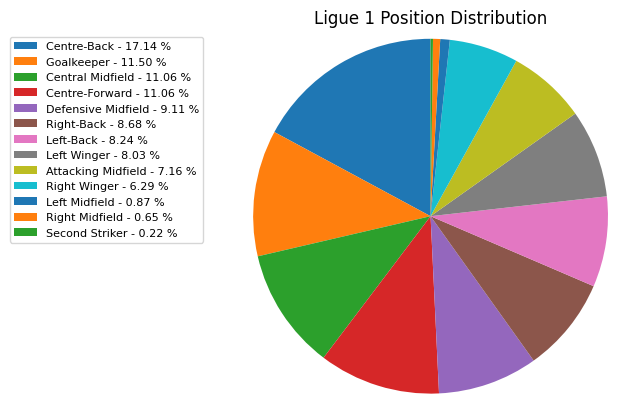

In [89]:
def get_pos_dist(pos, title):
    # Count player occurrences for each position
    position_counts = pos.value_counts()

    # Get pie chart slice labels from the index of position_counts
    x = position_counts.index.to_numpy()  # Convert index to NumPy array

    # Get pie chart slice values from the values of position_counts
    y = position_counts.to_numpy()

#     colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.title(title)
    plt.show()
get_pos_dist(prem_player_data_df["Position"], "Premier League Position Distribution")
get_pos_dist(laliga_player_data_df["Position"], "La Liga Position Distribution")
get_pos_dist(bundesliga_player_data_df["Position"], "Bundesliga Position Distribution")
get_pos_dist(serie_a_player_data_df["Position"], "Serie A Position Distribution")
get_pos_dist(ligue_1_player_data_df["Position"], "Ligue 1 Position Distribution")


# Frequency of injury in each league

In [90]:
def get_injury_stats(df):
    injuries = df['Injuries']
    injured = 0
    not_injured = 0
    for injury in injuries:
        # Convert sting to dictionary
        injury = eval(injury)
        if len(injury) == 0:
            not_injured += 1
        else:
            injured += 1
    return injured, not_injured

prem_injured, prem_not_injured = get_injury_stats(prem_player_data_df)
laliga_injured, laliga_not_injured = get_injury_stats(laliga_player_data_df)
bundesliga_injured, bundesliga_not_injured = get_injury_stats(bundesliga_player_data_df)
serie_a_injured, serie_a_not_injured = get_injury_stats(serie_a_player_data_df)
ligue_1_injured, ligue_1_not_injured = get_injury_stats(ligue_1_player_data_df)

total_injured = prem_injured + laliga_injured + bundesliga_injured + serie_a_injured + ligue_1_injured
total_not_injured = prem_not_injured + laliga_not_injured + bundesliga_not_injured + serie_a_not_injured + ligue_1_not_injured

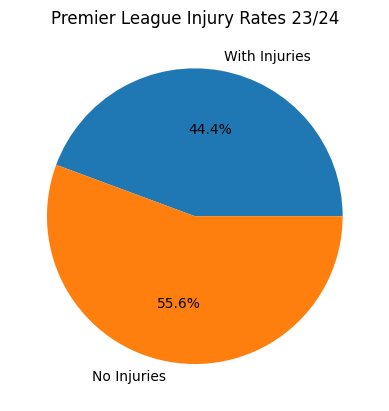

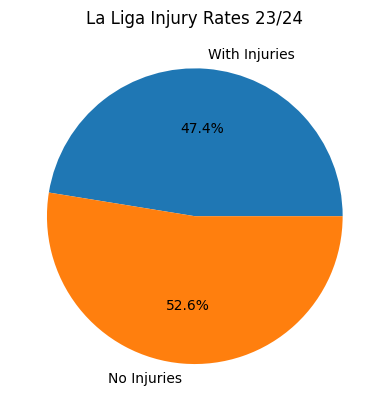

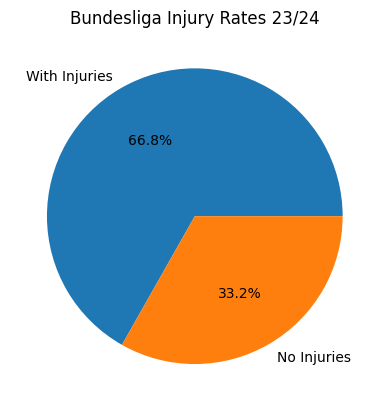

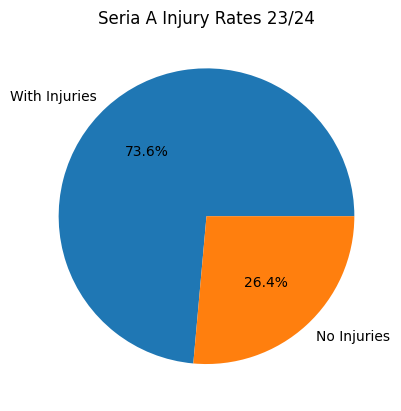

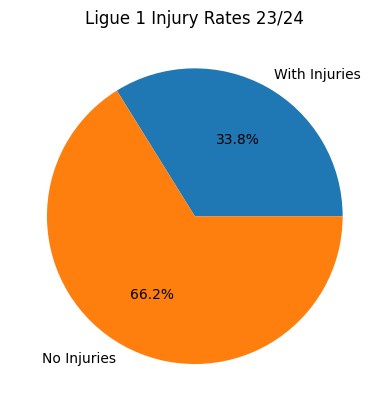

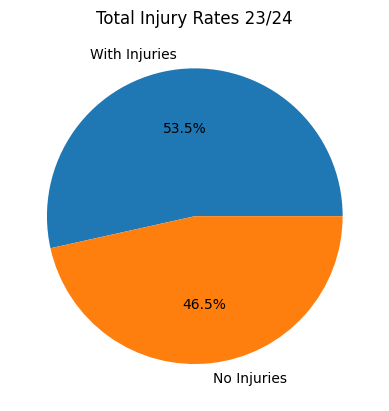

In [91]:
def get_injury_chart(injured, not_injured, title):
    total = injured + not_injured
    sizes = np.array([injured / total, not_injured / total])
    labels = ["With Injuries", "No Injuries"]
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    
get_injury_chart(prem_injured, prem_not_injured, "Premier League Injury Rates 23/24")
get_injury_chart(laliga_injured, laliga_not_injured, "La Liga Injury Rates 23/24")
get_injury_chart(bundesliga_injured, bundesliga_not_injured, "Bundesliga Injury Rates 23/24")
get_injury_chart(serie_a_injured, serie_a_not_injured, "Seria A Injury Rates 23/24")
get_injury_chart(ligue_1_injured, ligue_1_not_injured, "Ligue 1 Injury Rates 23/24")
get_injury_chart(total_injured, total_not_injured, "Total Injury Rates 23/24")

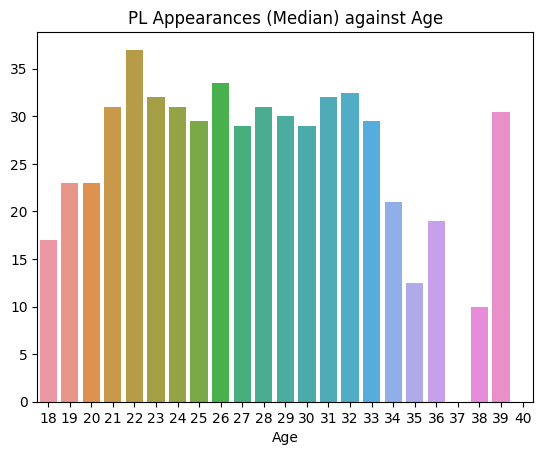

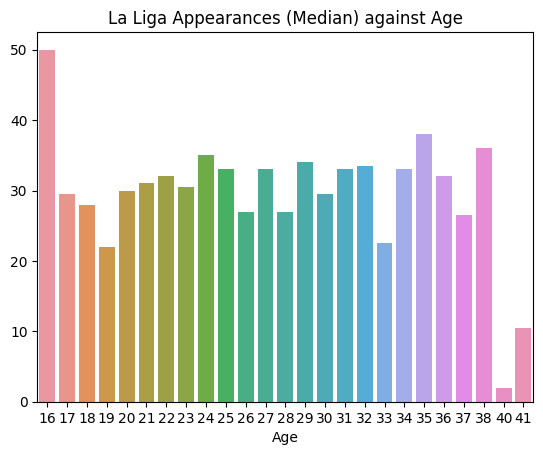

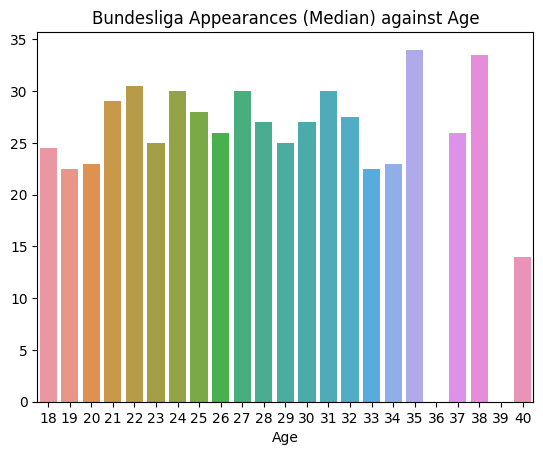

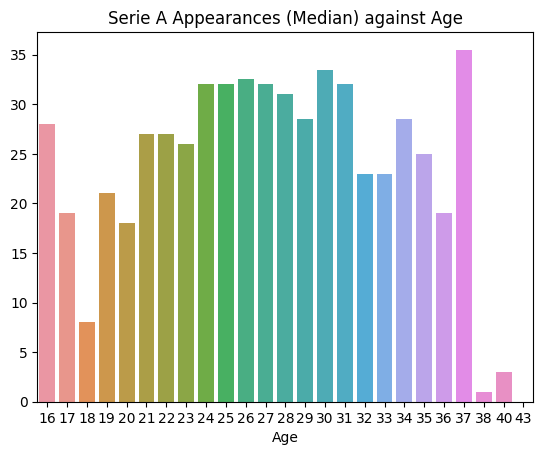

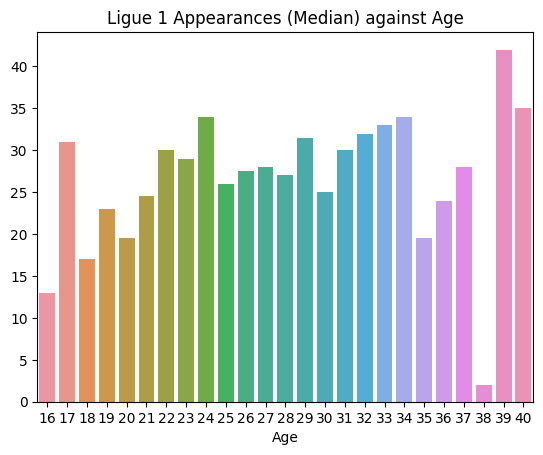

In [93]:
def get_age_appearance_dist(df, title):
    avg_appearances_by_age = df.groupby('Age')['Appearances'].median()
    sns.barplot(x=avg_appearances_by_age.index, y=avg_appearances_by_age.values, errorbar="sd").set(title=title)
    plt.show()
    
get_age_appearance_dist(prem_player_data_df, "PL Appearances (Median) against Age")
get_age_appearance_dist(laliga_player_data_df, "La Liga Appearances (Median) against Age")
get_age_appearance_dist(bundesliga_player_data_df, "Bundesliga Appearances (Median) against Age")
get_age_appearance_dist(serie_a_player_data_df, "Serie A Appearances (Median) against Age")
get_age_appearance_dist(ligue_1_player_data_df, "Ligue 1 Appearances (Median) against Age")


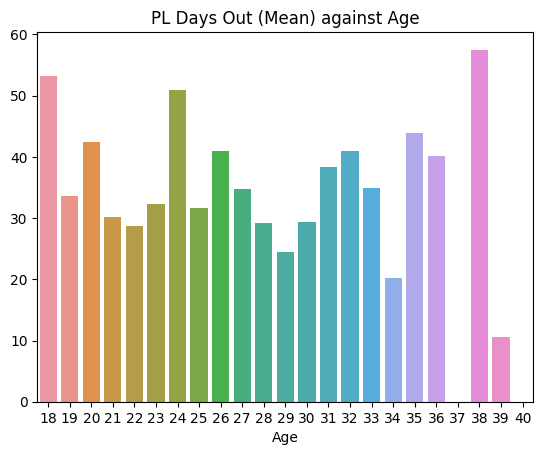

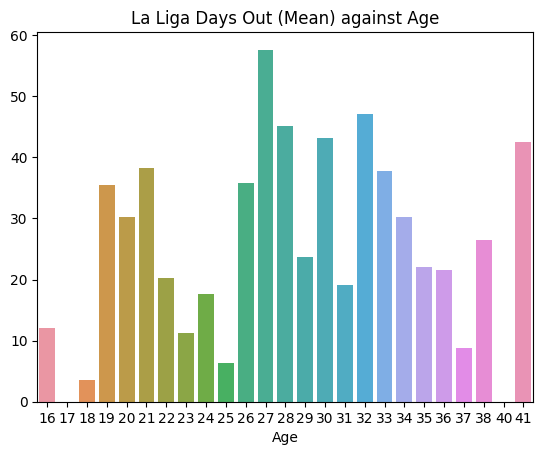

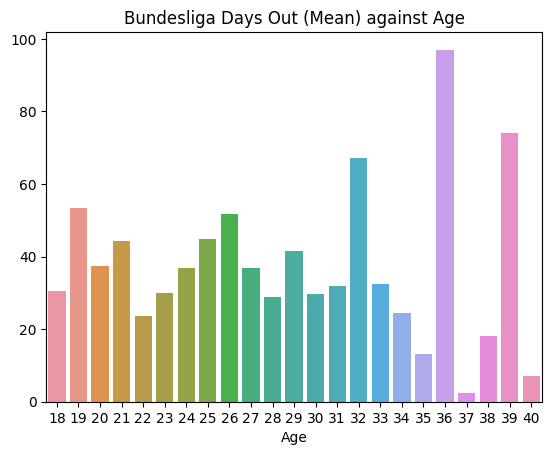

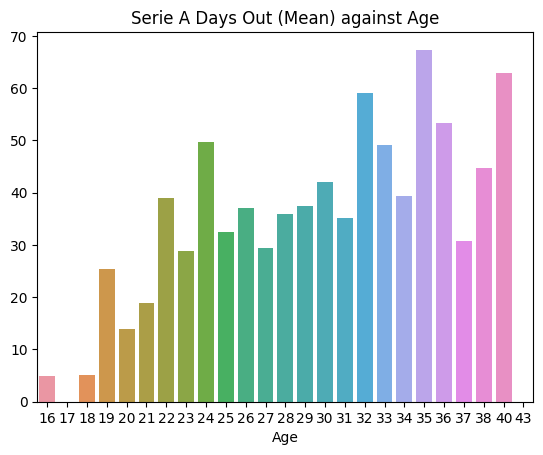

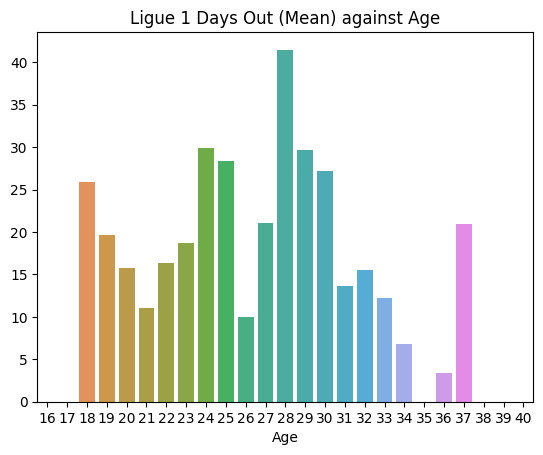

In [100]:
def get_age_days_out_dist(df, title):
    avg_days_out_by_age = df.groupby('Age')['Total Days'].mean()
    sns.barplot(x=avg_days_out_by_age.index, y=avg_days_out_by_age.values, errorbar="sd").set(title=title)
    plt.show()
    
get_age_days_out_dist(prem_player_data_df, "PL Days Out (Mean) against Age")
get_age_days_out_dist(laliga_player_data_df, "La Liga Days Out (Mean) against Age")
get_age_days_out_dist(bundesliga_player_data_df, "Bundesliga Days Out (Mean) against Age")
get_age_days_out_dist(serie_a_player_data_df, "Serie A Days Out (Mean) against Age")
get_age_days_out_dist(ligue_1_player_data_df, "Ligue 1 Days Out (Mean) against Age")